# Healthcare Analytics 
## Predicting length of stay for patients

### Importing neccessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
import tensorflow as tf

### The Dataset

In [2]:
data = pd.read_csv("../input/av-janatahack-healthcare-hackathon-ii/Data/train.csv")
train_data_dict = pd.read_csv("../input/av-janatahack-healthcare-hackathon-ii/Data/train_data_dict.csv")

In [3]:
data.head(10)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
5,6,23,a,6,X,2,anesthesia,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,4449.0,11-20
6,7,32,f,9,Y,1,radiotherapy,S,B,3.0,31397,7.0,Emergency,Extreme,2,51-60,6167.0,0-10
7,8,23,a,6,X,4,radiotherapy,Q,F,3.0,31397,7.0,Trauma,Extreme,2,51-60,5571.0,41-50
8,9,1,d,10,Y,2,gynecology,R,B,4.0,31397,7.0,Trauma,Extreme,2,51-60,7223.0,51-60
9,10,10,e,1,X,2,gynecology,S,E,3.0,31397,7.0,Trauma,Extreme,2,51-60,6056.0,31-40


In [4]:
data.set_index('case_id', inplace=True)

In [5]:
#description of each column
train_data_dict

,Column,Description
0,case_id,Case_ID registered in Hospital
1,Hospital_code,Unique code for the Hospital
2,Hospital_type_code,Unique code for the type of Hospital
3,City_Code_Hospital,City Code of the Hospital
4,Hospital_region_code,Region Code of the Hospital
5,Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
6,Department,Department overlooking the case
7,Ward_Type,Code for the Ward type
8,Ward_Facility_Code,Code for the Ward Facility
9,Bed Grade,Condition of Bed in the Ward


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318438 entries, 1 to 318438
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      318438 non-null  int64  
 1   Hospital_type_code                 318438 non-null  object 
 2   City_Code_Hospital                 318438 non-null  int64  
 3   Hospital_region_code               318438 non-null  object 
 4   Available Extra Rooms in Hospital  318438 non-null  int64  
 5   Department                         318438 non-null  object 
 6   Ward_Type                          318438 non-null  object 
 7   Ward_Facility_Code                 318438 non-null  object 
 8   Bed Grade                          318325 non-null  float64
 9   patientid                          318438 non-null  int64  
 10  City_Code_Patient                  313906 non-null  float64
 11  Type of Admission                  3184

### Preprocessing

#### checking if there are any duplicate values

In [7]:
# i = 0
# for item in train_df.duplicated():
#     if item == True:
#         print(item)
#     else:
#         i +=1
# print(i)  # -> 0

#### checking for null values

In [8]:
data.isnull().sum()

Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

Removing the null values and populating it with mean value.

In [9]:
def impute_missing_values(data, columns):
    for column in columns:
        data[column] = data[column].fillna(data[column].mean())

impute_values = ['Bed Grade', 'City_Code_Patient']  # these columns has empty values
impute_missing_values(data, impute_values)

### Encoding

In [10]:
data.dtypes

Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

Encode the categorical columns (column with 'object') to numerical values

In [11]:
def get_categorical_uniques(data):
    categorical_columns = [column for column in data.dtypes.index if data.dtypes[column] == 'object']
    categorical_uniques = {column: data[column].unique() for column in categorical_columns}
    
    return categorical_uniques

In [12]:
get_categorical_uniques(data)

{'Hospital_type_code': array(['c', 'e', 'b', 'a', 'f', 'd', 'g'], dtype=object),
 'Hospital_region_code': array(['Z', 'X', 'Y'], dtype=object),
 'Department': array(['radiotherapy', 'anesthesia', 'gynecology', 'TB & Chest disease',
        'surgery'], dtype=object),
 'Ward_Type': array(['R', 'S', 'Q', 'P', 'T', 'U'], dtype=object),
 'Ward_Facility_Code': array(['F', 'E', 'D', 'B', 'A', 'C'], dtype=object),
 'Type of Admission': array(['Emergency', 'Trauma', 'Urgent'], dtype=object),
 'Severity of Illness': array(['Extreme', 'Moderate', 'Minor'], dtype=object),
 'Age': array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
        '11-20', '0-10', '91-100'], dtype=object),
 'Stay': array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
        'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)}

<b>One hot encoding</b> can be done to columns:
   1. Hospital_type_code
   2. Hospital_region_code
   3. Department
   4. Ward_Type
   5. Ward_Facility_Code
as these column values have no priority ordering.

<b>Normal numeric coding</b> can be done to rest of the columns:
   1. Type of Admission
   2. Severity of Illness
   3. Age
   4. Stay
as these have a priority ordering

#### onehot encoding

In [13]:
def onehot_encode(data, columns):
    for column in columns:
        dummies = pd.get_dummies(data[column])       # onehot encoding 
        data = pd.concat([data, dummies], axis=1)    # adding encoded columns to dataset, axis=1 means add to column row
        data.drop(column, axis=1, inplace=True)      #inplace=True means make the drop permanent
    return data

In [14]:
onehot_columns = ['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code']

In [15]:
data = onehot_encode(data, onehot_columns)

In [16]:
data

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,...,R,S,T,U,A,B,C,D,E,F
case_id,,,,,,,,,,,,,,,,,,,,,
1,8,3,3,2.0,31397,7.0,Emergency,Extreme,2,51-60,...,1,0,0,0,0,0,0,0,0,1
2,2,5,2,2.0,31397,7.0,Trauma,Extreme,2,51-60,...,0,1,0,0,0,0,0,0,0,1
3,10,1,2,2.0,31397,7.0,Trauma,Extreme,2,51-60,...,0,1,0,0,0,0,0,0,1,0
4,26,2,2,2.0,31397,7.0,Trauma,Extreme,2,51-60,...,1,0,0,0,0,0,0,1,0,0
5,26,2,2,2.0,31397,7.0,Trauma,Extreme,2,51-60,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318434,6,6,3,4.0,86499,23.0,Emergency,Moderate,3,41-50,...,0,0,0,0,0,0,0,0,0,1
318435,24,1,2,4.0,325,8.0,Urgent,Moderate,4,81-90,...,0,0,0,0,0,0,0,0,1,0
318436,7,4,3,4.0,125235,10.0,Emergency,Minor,3,71-80,...,1,0,0,0,0,0,0,0,0,1


In [17]:
categorical_uniques = get_categorical_uniques(data)
categorical_uniques

{'Type of Admission': array(['Emergency', 'Trauma', 'Urgent'], dtype=object),
 'Severity of Illness': array(['Extreme', 'Moderate', 'Minor'], dtype=object),
 'Age': array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
        '11-20', '0-10', '91-100'], dtype=object),
 'Stay': array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
        'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)}

Sorting the remaining categorical values in ascending order

In [18]:
for column in categorical_uniques:
    categorical_uniques[column] = sorted(categorical_uniques[column])

In [19]:
categorical_uniques

{'Type of Admission': ['Emergency', 'Trauma', 'Urgent'],
 'Severity of Illness': ['Extreme', 'Minor', 'Moderate'],
 'Age': ['0-10',
  '11-20',
  '21-30',
  '31-40',
  '41-50',
  '51-60',
  '61-70',
  '71-80',
  '81-90',
  '91-100'],
 'Stay': ['0-10',
  '11-20',
  '21-30',
  '31-40',
  '41-50',
  '51-60',
  '61-70',
  '71-80',
  '81-90',
  '91-100',
  'More than 100 Days']}

'Type of Admission' and 'Severity of Illness' columns needs to be manually sorted in order of priority

In [20]:
unique_list = categorical_uniques['Type of Admission']
unique_list.insert(0, unique_list.pop(unique_list.index('Urgent')))
unique_list.insert(0, unique_list.pop(unique_list.index('Trauma')))

unique_list = categorical_uniques['Severity of Illness']
unique_list.insert(0, unique_list.pop(unique_list.index('Moderate')))
unique_list.insert(0, unique_list.pop(unique_list.index('Minor')))

In [21]:
categorical_uniques    # now these columns are sorted in order of priority

{'Type of Admission': ['Trauma', 'Urgent', 'Emergency'],
 'Severity of Illness': ['Minor', 'Moderate', 'Extreme'],
 'Age': ['0-10',
  '11-20',
  '21-30',
  '31-40',
  '41-50',
  '51-60',
  '61-70',
  '71-80',
  '81-90',
  '91-100'],
 'Stay': ['0-10',
  '11-20',
  '21-30',
  '31-40',
  '41-50',
  '51-60',
  '61-70',
  '71-80',
  '81-90',
  '91-100',
  'More than 100 Days']}

After mapping, we will lose the original value. 
After prediction we will need to remap the stay values to respective days range. For that we are preserving the mapping.

In [22]:
stay_mappings = {value: index for index, value in enumerate(categorical_uniques['Stay'])}
stay_mappings

{'0-10': 0,
 '11-20': 1,
 '21-30': 2,
 '31-40': 3,
 '41-50': 4,
 '51-60': 5,
 '61-70': 6,
 '71-80': 7,
 '81-90': 8,
 '91-100': 9,
 'More than 100 Days': 10}

#### ordinal encoding

In [23]:
def ordinal_encoding(data, uniques):
    for column in uniques:
        data[column] = data[column].apply(lambda x: uniques[column].index(x))

In [24]:
ordinal_encoding(data, categorical_uniques)

Correlation between columns and 'Stay' column

In [25]:
for col in data.columns.values.tolist():
    print(col + ' : ' + str(data[col].corr(data['Stay'])))

Hospital_code : 0.04284557472532863
City_Code_Hospital : 0.00638097699968916
Available Extra Rooms in Hospital : -0.12111984506714463
Bed Grade : 0.025736513760105186
patientid : 0.0011247864602724038
City_Code_Patient : -0.009625233784773288
Type of Admission : -0.0843788124369608
Severity of Illness : 0.12615971786797117
Visitors with Patient : 0.5375366504724675
Age : 0.09416326795751238
Admission_Deposit : -0.05207692726906841
Stay : 1.0
a : -0.07075893215806142
b : 0.04009251292968163
c : 0.013648495287559789
d : 0.021420548461382336
e : -0.003343357335244349
f : 0.030880056550402345
g : 0.03460462646993682
X : -0.012303675999893496
Y : 0.006538817756116777
Z : 0.007266429205150117
TB & Chest disease : -0.009482084936749076
anesthesia : -0.029596694373108575
gynecology : 0.010515766980378956
radiotherapy : 0.01729005355565621
surgery : 0.015536689419824666
P : -0.03590472733589073
Q : -0.1332646090564743
R : -0.019014324125649466
S : 0.17693562428945436
T : 0.009119405762158875
U 

### Scaling

In [26]:
y = data['Stay']
X = data.drop('Stay', axis=1)

#### StandardScaler
Scaling to unit variance <i>(mean value 0 and standard deviation of 1)</i> <br>
This will make it easier for our models to work with. <br>
StandardScaler returns a numpy array, so we will then need to convert it to pandas dataframe.


In [27]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)

In [28]:
X

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,...,R,S,T,U,A,B,C,D,E,F
case_id,,,,,,,,,,,,,,,,,,,,,
1,-1.195176,-0.571055,-0.169177,-0.716855,-0.904442,-0.053458,1.212557,1.646648,-0.727923,0.461600,...,1.220175,-0.568572,-0.068263,-0.005316,-0.309922,-0.352282,-0.354009,-0.440807,-0.458683,1.350633
2,-1.890124,0.073580,-1.025217,-0.716855,-0.904442,-0.053458,-0.974973,1.646648,-0.727923,0.461600,...,-0.819554,1.758792,-0.068263,-0.005316,-0.309922,-0.352282,-0.354009,-0.440807,-0.458683,1.350633
3,-0.963527,-1.215691,-1.025217,-0.716855,-0.904442,-0.053458,-0.974973,1.646648,-0.727923,0.461600,...,-0.819554,1.758792,-0.068263,-0.005316,-0.309922,-0.352282,-0.354009,-0.440807,2.180153,-0.740394
4,0.889668,-0.893373,-1.025217,-0.716855,-0.904442,-0.053458,-0.974973,1.646648,-0.727923,0.461600,...,1.220175,-0.568572,-0.068263,-0.005316,-0.309922,-0.352282,-0.354009,2.268564,-0.458683,-0.740394
5,0.889668,-0.893373,-1.025217,-0.716855,-0.904442,-0.053458,-0.974973,1.646648,-0.727923,0.461600,...,-0.819554,1.758792,-0.068263,-0.005316,-0.309922,-0.352282,-0.354009,2.268564,-0.458683,-0.740394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318434,-1.426825,0.395897,-0.169177,1.574123,0.546379,3.342582,1.212557,0.138090,-0.161049,-0.067622,...,-0.819554,-0.568572,-0.068263,-0.005316,-0.309922,-0.352282,-0.354009,-0.440807,-0.458683,1.350633
318435,0.658018,-1.215691,-1.025217,1.574123,-1.722559,0.158795,0.118792,0.138090,0.405826,2.049268,...,-0.819554,-0.568572,-0.068263,-0.005316,-0.309922,-0.352282,-0.354009,-0.440807,2.180153,-0.740394
318436,-1.311001,-0.248738,-0.169177,1.574123,1.566288,0.583300,1.212557,-1.370469,-0.161049,1.520045,...,1.220175,-0.568572,-0.068263,-0.005316,-0.309922,-0.352282,-0.354009,-0.440807,-0.458683,1.350633


### Training

#### Splitting the data set into training and test data

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

#### Building the neural network

In [30]:
inputs = tf.keras.Input(shape=(38,))
x = tf.keras.layers.Dense(16, activation='relu')(inputs)
x = tf.keras.layers.Dense(16, activation='relu')(x)
outputs = tf.keras.layers.Dense(11, activation='softmax')(x)

nn_model = tf.keras.Model(inputs=inputs, outputs=outputs)

2022-05-29 15:26:21.351501: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [31]:
nn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [32]:
batch_size = 32
epochs = 15

history = nn_model.fit(
    X_train,
    y_train,
    validation_split = 0.3,
    batch_size = batch_size,
    epochs = epochs
)

2022-05-29 15:26:21.656511: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15
4877/4877 [==============================] - 12s 2ms/step - loss: 1.6625 - accuracy: 0.3698 - val_loss: 1.5948 - val_accuracy: 0.3955
Epoch 2/15
4877/4877 [==============================] - 11s 2ms/step - loss: 1.5827 - accuracy: 0.3973 - val_loss: 1.5726 - val_accuracy: 0.3992
Epoch 3/15
4877/4877 [==============================] - 11s 2ms/step - loss: 1.5656 - accuracy: 0.4018 - val_loss: 1.5634 - val_accuracy: 0.4024
Epoch 4/15
4877/4877 [==============================] - 11s 2ms/step - loss: 1.5559 - accuracy: 0.4035 - val_loss: 1.5520 - val_accuracy: 0.4045
Epoch 5/15
4877/4877 [==============================] - 11s 2ms/step - loss: 1.5505 - accuracy: 0.4052 - val_loss: 1.5506 - val_accuracy: 0.4015
Epoch 6/15
4877/4877 [==============================] - 11s 2ms/step - loss: 1.5472 - accuracy: 0.4052 - val_loss: 1.5469 - val_accuracy: 0.4050
Epoch 7/15
4877/4877 [==============================] - 11s 2ms/step - loss: 1.5448 - accuracy: 0.4068 - val_loss: 1.5458 - val_ac

In [33]:
print(f"Neural Network Accuracy:{nn_model.evaluate(X_test, y_test, verbose=0)[1]}")

Neural Network Accuracy:0.4065234661102295


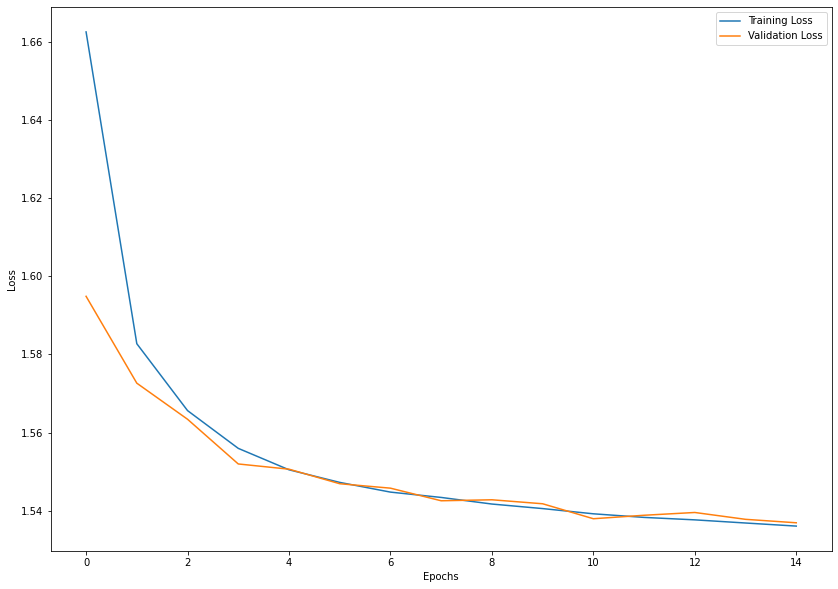

In [34]:
plt.figure(figsize=(14, 10))

plt.plot(range(epochs), history.history['loss'], label='Training Loss')
plt.plot(range(epochs), history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()